<a href="https://colab.research.google.com/github/ZainaNamugabo/Wine-Quality-detection/blob/main/Machine_learning_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The Wine Quality dataset includes several physicochemical properties that influence wine quality. Key columns often used to determine wine quality include:

- **Alcohol**: Higher alcohol content is generally associated with better quality.
- **Volatile Acidity**: Lower levels of volatile acidity are preferred, as higher levels can give an unpleasant vinegar-like taste.
- **Sulphates**: These contribute to the wine's preservation and enhance its flavor.
- **Citric Acid**: Adds freshness and enhances the wine's taste.
- **Residual Sugar**: Sweetness in wine, though excessive sugar can lower quality.
- **pH**: Indicates the wine's acidity level; balanced acidity is crucial for quality.
- **Density**: Related to sugar content and alcohol level.
- **Chlorides**: Excessive chlorides can negatively impact taste.

These features are often analyzed to predict wine quality scores, which range from 0 to 10. Let me know if you'd like to dive deeper into any of these! 🍷


In [ ]:
y= df['quality'] #allocate our target as y
df = df.drop(columns='quality') #we drop our target from the df


In [ ]:
y.value_counts()

,count
quality,
medium,837
low,744
high,18


In [ ]:
x =df[['alcohol', 'volatile acidity','sulphates','citric acid','residual sugar','pH','density','chlorides']]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x.columns

Index(['alcohol', 'volatile acidity', 'sulphates', 'citric acid',
       'residual sugar', 'pH', 'density', 'chlorides'],
      dtype='object')

In [ ]:
print(x_train.select_dtypes('number').columns) #checking all columns with numbers



Index(['alcohol', 'volatile acidity', 'sulphates', 'citric acid',
       'residual sugar', 'pH', 'density', 'chlorides'],
      dtype='object')


In [ ]:
x_train.head()

,alcohol,volatile acidity,sulphates,citric acid,residual sugar,pH,density,chlorides
493,11.6,0.690,0.74,0.31,3.0,3.48,1.00020,0.086
354,11.9,0.210,0.59,0.40,1.4,3.25,0.99120,0.066
342,9.8,0.390,0.75,0.47,1.8,3.30,0.99820,0.118
834,9.4,0.685,0.47,0.26,1.6,3.32,0.99694,0.088
705,9.9,1.035,0.49,0.15,6.0,3.37,0.99900,0.073


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#Import satndard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train) #fit the scaler on the Xtrain


StandardScaler()

In [ ]:
scaler.mean_ #find the mean of all columns in xtrain scaled

array([10.41810008,  0.53055903,  0.66002346,  0.27247068,  2.55547303,
        3.31164973,  0.99677398,  0.08844801])

In [ ]:
scaler.scale_ #finding the frame

array([1.05228266, 0.17920515, 0.17453636, 0.19537137, 1.43522825,
       0.15395546, 0.00185522, 0.04931313])

In [ ]:
x_train_scaled= scaler.transform(x_train)#Transform data in Xtrain
print(x_train_scaled)

[[ 1.12317723  0.88971201  0.45822284 ...  1.09349989  1.84669643
  -0.04964208]
 [ 1.40827174 -1.78878251 -0.40119696 ... -0.40043872 -3.00449133
  -0.45521361]
 [-0.58738978 -0.78434707  0.51551749 ... -0.07566946  0.76865471
   0.59927236]
 ...
 [-0.87248428  0.49909822 -0.68767023 ...  1.28836145  0.36977927
  -0.23214927]
 [ 1.40827174 -1.84458448  0.80199076 ...  0.05423824 -1.18260081
  -0.69855653]
 [ 2.92877575 -1.34236676 -0.68767023 ...  0.50891521 -2.84278507
  -0.51604934]]


In [ ]:
print(x_train_scaled.mean(axis=0)) #mean of standard values in X_train

[ 4.72213702e-16  4.11798126e-16  4.15270285e-16  1.26386609e-16
  1.52775021e-17 -1.35830883e-15  2.55939827e-14  3.74993234e-17]


In [ ]:
print(x_train_scaled.std(axis=0)) # standard deviation

[1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
x_test.head()

,alcohol,volatile acidity,sulphates,citric acid,residual sugar,pH,density,chlorides
803,9.6,0.56,0.66,0.08,2.50,3.24,0.9971,0.114
124,9.5,0.50,0.48,0.17,1.60,3.39,0.9960,0.082
350,9.9,0.67,0.98,0.22,2.70,3.28,1.0004,0.107
682,9.8,0.46,0.54,0.31,2.25,3.33,0.9980,0.078
1326,10.6,0.46,0.60,0.24,1.70,3.39,0.9948,0.077


In [ ]:
x_test_scaled= scaler.transform(x_test) #Note that we do not fit the scaler on X_test but we just transform the data
print(x_test_scaled)

[[-7.77452782e-01  1.64286407e-01 -1.34389336e-04 ... -4.65392578e-01
   1.75731759e-01  5.18158057e-01]
 [-8.72484283e-01 -1.70525408e-01 -1.03143815e+00 ...  5.08915214e-01
  -4.17191190e-01 -1.30756387e-01]
 [-4.92358280e-01  7.78108067e-01  1.83329452e+00 ... -2.05577167e-01
   1.95450060e+00  3.76208022e-01]
 ...
 [-5.87389780e-01  3.87494284e-01 -7.44964886e-01 ... -1.04997725e+00
  -3.30947852e-01  5.99272362e-01]
 [ 7.43051230e-01 -1.45397070e+00  1.71749571e-01 ... -1.04997725e+00
  -7.08262456e-01  2.34257987e-01]
 [-6.82421281e-01  1.30822677e+00 -6.87670232e-01 ... -1.40623314e-01
   6.60850535e-01 -2.11870693e-01]]


In [ ]:
print(x_test_scaled.mean(axis=0)) #mean of standard values

[ 0.02318761 -0.07635958 -0.05366908 -0.03823836 -0.05802946 -0.01741397
 -0.0735317  -0.09945134]


In [ ]:
x_test_scaled.max(axis=0)

array([3.40393325, 3.26129569, 4.01049136, 2.64895173, 7.5559598 ,
       4.53605409, 3.43680798, 6.76395958])

In [ ]:
print(x_test_scaled.std(axis=0)) # standard deviation

[1.06032677 0.99202249 0.84316158 0.98315693 0.90535833 1.01224123
 1.08025655 0.73761962]


#Importing the Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
from sklearn import tree

In [ ]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Model training
#Fit on the training data
dec_tree.fit(x_train, y_train) #use labelled examples - X train and y_train. #output _ Trained model

DecisionTreeClassifier(random_state=42)

In [ ]:
# Testing the model -Obtain predictions

#dec_tree.predict(x_test)
test_preds = dec_tree.predict(x_test)  #test on new instances which are not labelled
test_preds

#dec_tree.predict(X_test)

array(['low', 'low', 'low', 'low', 'medium', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'low', 'low', 'medium', 'low', 'low', 'low',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low',
       'medium', 'medium', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'medium', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'medium', 'medium', 'low', 'medium', 'low',
       'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'medium',
       'low', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'medi

In [ ]:
#Evaluating the model - test set - actual values(y_test) and pred_values

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

        high       0.25      0.20      0.22         5
         low       0.72      0.77      0.74       141
      medium       0.79      0.75      0.77       174

    accuracy                           0.75       320
   macro avg       0.58      0.57      0.58       320
weighted avg       0.75      0.75      0.75       320



In [ ]:
precision_score(y_test, test_preds, average = 'weighted')
precision_score(y_test, test_preds, average = 'macro')

0.584370191986086

In [ ]:
confusion_matrix(y_test, test_preds)

array([[  1,   1,   3],
       [  1, 108,  32],
       [  2,  42, 130]])

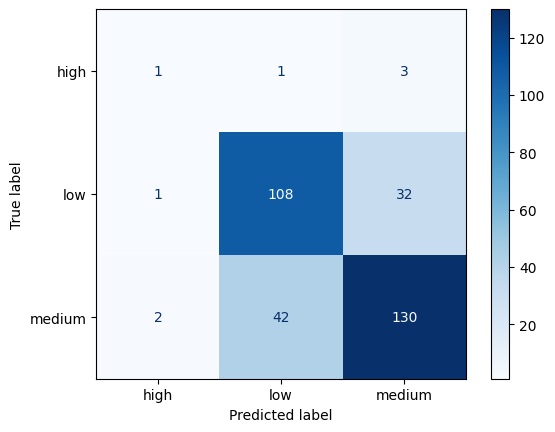

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

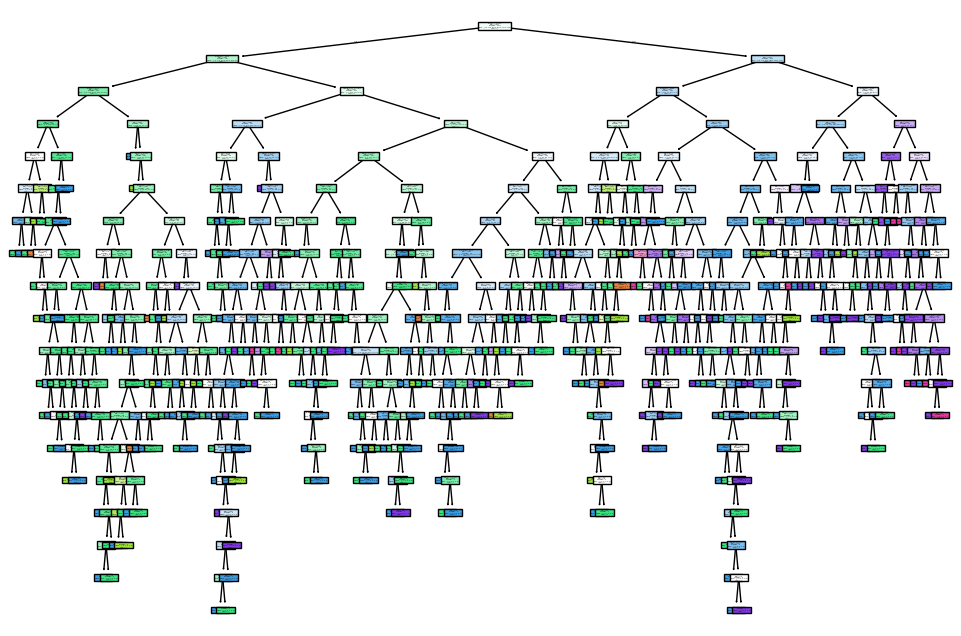

In [ ]:
plt.figure(figsize=(12, 8)) #Visualizing the decision tree
plot_tree(dec_tree, feature_names=x.columns, class_names=[str(c) for c in dec_tree.classes_], filled=True)
plt.show()


#Logistic regression

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load Wine Quality dataset
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')  # Update path to your dataset
X = data.drop('quality', axis=1)
y = data['quality']

# Group quality scores (you can adjust the bins and labels)
y = y.apply(lambda x: 'low' if x <= 5 else ('medium' if x <= 7 else 'high'))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.69      0.74      0.71       141
      medium       0.75      0.72      0.74       174

    accuracy                           0.72       320
   macro avg       0.48      0.49      0.48       320
weighted avg       0.71      0.72      0.72       320

Confusion Matrix:
 [[  0   0   5]
 [  0 105  36]
 [  0  48 126]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


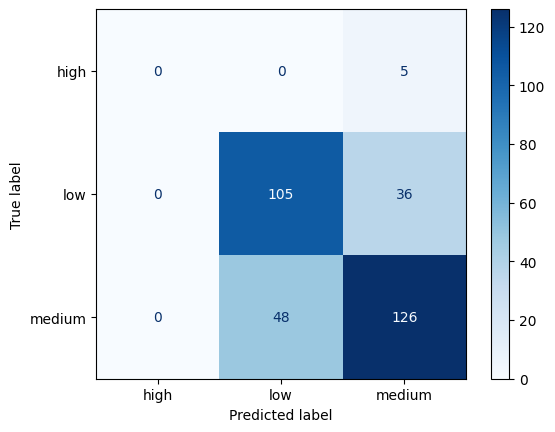

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues') #Display confusion matrix for logistic regression

#KN Classifier

In [ ]:
#importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#instantiate the object that will hold the KNN classifier

knn = KNeighborsClassifier(n_neighbors=21) #best K value - Elbow method

In [ ]:
#train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
#Test the model
knn_preds= knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.68      0.67      0.67       141
      medium       0.71      0.74      0.73       174

    accuracy                           0.70       320
   macro avg       0.46      0.47      0.47       320
weighted avg       0.69      0.70      0.69       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
confusion_matrix(y_test, knn_preds)

array([[  0,   0,   5],
       [  0,  94,  47],
       [  0,  45, 129]])